In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a Model class that inherits nn.Module

class Model(nn.Module):
  # input layer(4 features of the flower)-->
  # Hidden Layer1 (number of neurons) -->
  # Hidden Layer2(number of neurons) -->
  # output(3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) # fully connected 1(fc1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x)) # Rectified linear unit
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x
# Pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of model
model = Model()

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
# change last column from strings to integers
my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
my_df # gets the first 5 data


/tmp/ipython-input-69711/522122137.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# Train Test Split! Set X,y
X = my_df.drop('species', axis=1).values # convert these to numpy arrays using the values
y = my_df['species'].values


In [14]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41) # test size is 20%

#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error,
# how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam Optimizer, learning rate(if error doesn`t go down after a bunch of iterations(epochs), lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Train our model!
# Epochs?(one run through all the training data in our networks)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # compare predicted values and trained values
  # keep track of the losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.26768800616264343
Epoch: 60 Loss: 0.17942361533641815
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118493437767
Epoch: 90 Loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

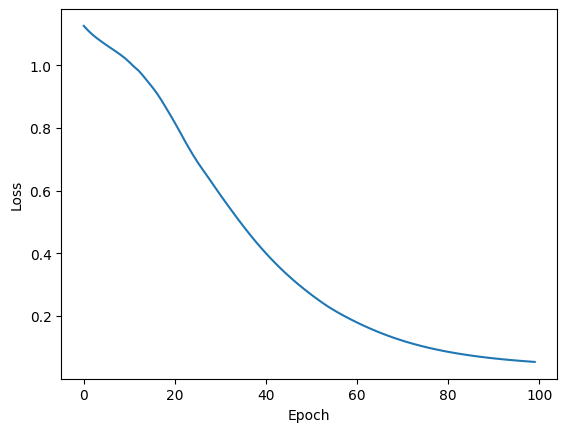

In [16]:
# graph it up
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [17]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Turn off back propagation
   y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
   loss = criterion(y_eval, y_test) # Find the loss


In [18]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]} {y_val.argmax().item()}') # the highest number is what the flower thinks it is

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'\n{correct} out of {len(y_test)}')

 1. tensor([-5.8760,  4.4628,  6.5124])    2 2
 2. tensor([-7.5436,  4.1670,  9.7255])    2 2
 3. tensor([-8.4504,  5.1271, 10.1987])    2 2
 4. tensor([-4.3398,  5.6267,  2.5608])    1 1
 5. tensor([-7.1825,  4.8754,  8.2992])    2 2
 6. tensor([-3.3974,  5.3463,  1.2803])    1 1
 7. tensor([-5.9231,  4.9822,  5.9997])    2 2
 8. tensor([-4.2881,  5.7003,  2.3889])    1 1
 9. tensor([-6.5356,  4.9257,  7.1260])    2 2
10. tensor([-8.0509,  4.4129, 10.3286])    2 2
11. tensor([-5.6762,  4.9500,  5.6215])    2 2
12. tensor([ 4.5662, -2.2476, -2.8911])    0 0
13. tensor([ 4.2571, -1.9967, -2.7330])    0 0
14. tensor([-2.1108,  4.0515,  0.5799])    1 1
15. tensor([ 3.4575, -1.2098, -2.3514])    0 0
16. tensor([-5.4724,  5.1165,  5.0934])    2 1
17. tensor([ 4.0557, -1.7949, -2.6492])    0 0
18. tensor([-5.8075,  4.6053,  6.2458])    1 2
19. tensor([ 4.4343, -2.1392, -2.8242])    0 0
20. tensor([ 3.4528, -1.2514, -2.3660])    0 0
21. tensor([-2.6189,  4.5619,  0.8574])    1 1
22. tensor([-

In [19]:
new_iris = torch.tensor([5.6, 3.2, 4.1, 2.1]) # new data points

with torch.no_grad():
  print(model(new_iris))


tensor([-5.0027,  5.0536,  4.3170])


In [20]:
# Save our NN Model

torch.save(model.state_dict(), 'iris_model.pt')

# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt')) # Loading the weights and bias that are saved
# Make sure it is loaded correctly
model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)